#### question 1:- Compute - What are the top 10 Zipcodes for 911 and Question 1: Are Zipcodes 
19446 and 19090 presents?

In [1]:
import pandas as pd

# coneting the dataset from github,"remember: - data should be a raw form like "raw.---" and the process it further
url = "https://raw.githubusercontent.com/mukut45/911-call-data-analysis-for-Pennsylvania-USA_python/refs/heads/main/911.csv"
df = pd.read_csv(url)
df.head (5) # printing the top 10 data from the given dataset

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# Count occurrences of each zipcode
top_zipcodes = df["zip"].value_counts().head(10) # computing the top 10 zip code for 911 with there counts of accurence

# Display the result
print(top_zipcodes)

zip
19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: count, dtype: int64


### Answer is:  from the above analysis, YES the given 19090.0 and 19446.0 present in top 10 zip codes in 911

### Compute - What are the top 4 townships (twp) for 911 calls and Question 2: Which 
of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN 
HORSHAM, ABINGTON

In [7]:
top_4_township = df["twp"].value_counts().head(5) # cheking for the top 4 twp in 911
top_4_township

twp
LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
CHELTENHAM      12272
Name: count, dtype: int64

### Answer is : LOWER POTTSGROVE and ABINGTON township are not present

### Compute - Create new features and Question 3: What is the most common reason for 
911 calls based on the Reason Column?Look for the column in the datasetd

In [11]:
# Check for null values in the 'title' column
missing_titles = df["title"].isnull().sum()
missing_titles

0

In [13]:
# Extract Reason from the 'title' column
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0]) # spliting by ":" in the index [0]

# Count occurrences of each Reason
common_reason = df["Reason"].value_counts()

# Display the most common reason
print(f"The most common reason for 911 calls is: {common_reason.idxmax()}")
print("\nCount of each reason:\n", common_reason)


The most common reason for 911 calls is: EMS

Count of each reason:
 Reason
EMS        133234
Traffic     93400
Fire        39909
Name: count, dtype: int64


In [15]:
# Reorder columns so that 'Reason' is the second column
cols = df.columns.tolist()  # Get the list of columns
cols

['lat',
 'lng',
 'desc',
 'zip',
 'title',
 'timeStamp',
 'twp',
 'addr',
 'e',
 'Reason']

In [17]:
cols.insert(1, cols.pop(cols.index("Reason")))  # Move 'Reason' to the second position
df = df[cols]  # Reassign DataFrame with reordered columns

# Display the first few rows to verify
print(df.head())

         lat Reason        lng  \
0  40.297876    EMS -75.581294   
1  40.258061    EMS -75.264680   
2  40.121182   Fire -75.351975   
3  40.116153    EMS -75.343513   
4  40.251492    EMS -75.603350   

                                                desc      zip  \
0  REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   

                     title            timeStamp                twp  \
0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4           EMS: DIZZINESS  2015-12-10 16:56:52   LOWE

In [19]:
df.head() # reconferming, if the "Reason" column is added as a second column

,lat,Reason,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,EMS,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,EMS,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,Fire,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,EMS,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,EMS,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Answer is: EMS

### Plot barchart using matplot for 911 calls by Reason and Question 4: How 
can you plot the bars horizontally?

In [23]:
# Print unique values from a specific column (replace 'column_name' with actual column)
unique_values = df["Reason"].unique()

# Display the unique values
print(unique_values)


['EMS' 'Fire' 'Traffic']


In [25]:
# Print unique values from a specific column (replace 'column_name' with actual column)
unique_values = df["zip"].unique()

# Display the unique values
print(unique_values)

[19525. 19446. 19401.    nan 19044. 19426. 19438. 19462. 19428. 19040.
 19027. 18936. 18974. 19031. 19403. 19422. 19085. 18964. 19038. 19406.
 19468. 19010. 19095. 19464. 19444. 19041. 19440. 19405. 19002. 19096.
 19454. 19465. 19004. 19066. 19072. 18041. 19046. 19090. 19012. 19025.
 19473. 18073. 18969. 18074. 19460. 19001. 18054. 19009. 19006. 19035.
 19150. 19075. 19034. 19151. 19453. 19003. 18914. 19512. 18976. 19120.
 18915. 18076. 19477. 19087. 18966. 19131. 19128. 19083. 19053. 19475.
 18960. 19504. 18070. 19492. 18932. 19118. 18092. 19490. 19518. 18056.
 19119. 19107. 17752. 19111. 18927. 19435. 18951. 19472. 19503. 19126.
 19505. 19423. 19138. 36107. 18036. 19116. 19139. 19129. 19115. 19355.
 77316. 19457. 19082. 19127. 19443. 17555. 19520. 19063. 19020. 19404.
 19382. 19474. 19057. 19073. 19121. 18958. 19026. 19018. 19047. 19064.
 19602.]


In [27]:
# Count the number of unique zip codes
unique_zip_count = df["zip"].nunique()
unique_zip_count

120

In [29]:
# Print unique values from a specific column (replace 'column_name' with actual column)
unique_values = df["twp"].unique()

# Display the unique values
print(unique_values)

['NEW HANOVER' 'HATFIELD TOWNSHIP' 'NORRISTOWN' 'LOWER POTTSGROVE'
 'LANSDALE' 'HORSHAM' 'SKIPPACK' 'LOWER SALFORD' 'PLYMOUTH' 'MONTGOMERY'
 'UPPER MORELAND' 'CHELTENHAM' 'UPPER MERION' 'WHITEMARSH' 'UPPER GWYNEDD'
 'LOWER PROVIDENCE' 'UPPER DUBLIN' 'WHITPAIN' 'DELAWARE COUNTY'
 'FRANCONIA' 'WEST CONSHOHOCKEN' 'LOWER MERION' 'LIMERICK' 'TOWAMENCIN'
 'DOUGLASS' 'POTTSTOWN' 'BRIDGEPORT' 'AMBLER' 'CHESTER COUNTY'
 'UPPER HANOVER' 'SPRINGFIELD' 'ROCKLEDGE' 'ABINGTON' 'WEST NORRITON'
 'ROYERSFORD' 'UPPER SALFORD' 'LOWER MORELAND' 'CONSHOHOCKEN' 'PENNSBURG'
 'TELFORD' 'EAST NORRITON' 'UPPER FREDERICK' 'UPPER PROVIDENCE' 'SALFORD'
 'HATFIELD BORO' 'LEHIGH COUNTY' 'LOWER GWYNEDD' 'MARLBOROUGH'
 'BRYN ATHYN' 'HATBORO' 'WORCESTER' 'COLLEGEVILLE' 'SCHWENKSVILLE'
 'PERKIOMEN' 'SOUDERTON' 'UPPER POTTSGROVE' 'LOWER FREDERICK'
 'BUCKS COUNTY' 'RED HILL' 'WEST POTTSGROVE' 'EAST GREENVILLE'
 'BERKS COUNTY' 'NORTH WALES' 'JENKINTOWN' 'TRAPPE' nan 'NARBERTH'
 'GREEN LANE' 'PHILA COUNTY']


In [31]:
# Count the number of unique township
unique_township = df["twp"].nunique()
unique_township

68

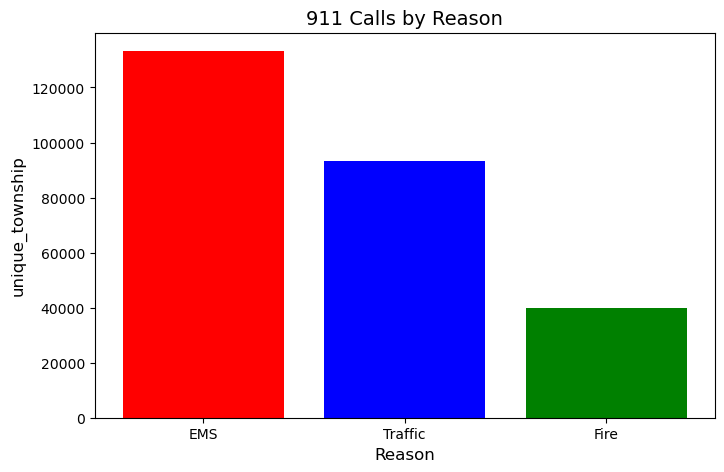

In [33]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(common_reason.index, common_reason.values, color=["red", "blue", "green"])

# Add labels and title
plt.xlabel("Reason", fontsize=12)
plt.ylabel("unique_township", fontsize=12)
plt.title("911 Calls by Reason", fontsize=14)
plt.xticks(rotation=0)  # Keep labels horizontal

# Show plot
plt.show()

### Plot the same bar chart like above but horizontaly

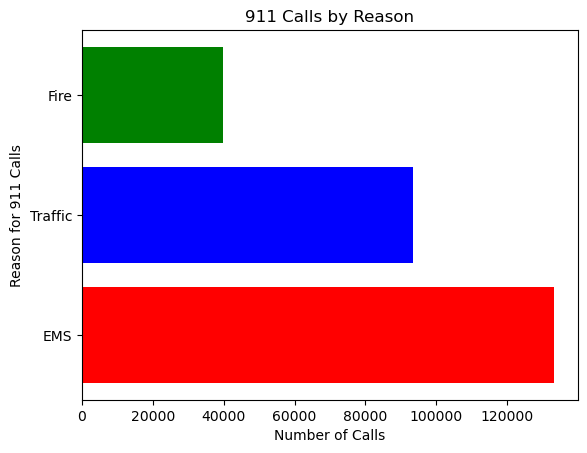

In [36]:
import matplotlib.pyplot as plt

# Extract x and y values
x_values = common_reason.index  # Categories (e.g., Medical, Fire, Traffic)
y_values = common_reason.values  # Number of calls

# Define colors
colors = ["red", "blue", "green"]

# Plot the horizontal bar chart
plt.barh(x_values, y_values, color=colors) # "barh" is used for horizontal ploting

# Labels and title
plt.xlabel("Number of Calls")
plt.ylabel("Reason for 911 Calls")
plt.title("911 Calls by Reason")

# Show the plot
plt.show()

### Question 5: Which day got maximum calls for EMS and how many??

In [39]:
print(df.dtypes)

lat          float64
Reason        object
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object


In [41]:
# Convert 'timeStamp' to datetime format
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [42]:
print(df.dtypes) # checking the datatypes if converted

lat                 float64
Reason               object
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
dtype: object


In [45]:
# Extract the day of the week
df["DayOfWeek"] = df["timeStamp"].dt.day_name() 
df.head() # checking

,lat,Reason,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek
0,40.297876,EMS,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thursday
1,40.258061,EMS,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thursday
2,40.121182,Fire,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thursday
3,40.116153,EMS,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thursday
4,40.251492,EMS,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,Thursday


In [47]:
# Filter for EMS calls
ems_calls = df[df["Reason"] == "EMS"]
ems_calls.head(5)


,lat,Reason,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek
0,40.297876,EMS,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thursday
1,40.258061,EMS,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thursday
3,40.116153,EMS,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thursday
4,40.251492,EMS,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,Thursday
5,40.253473,EMS,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,Thursday


In [49]:
# Count EMS calls by day
calls_by_day = ems_calls["DayOfWeek"].value_counts()
calls_by_day

DayOfWeek
Friday       19938
Tuesday      19575
Wednesday    19422
Monday       19389
Thursday     19297
Saturday     18229
Sunday       17384
Name: count, dtype: int64

In [51]:
# Find the day with the most EMS calls
max_day = calls_by_day.idxmax()
max_calls = calls_by_day.max()

# Print results
print(f"The day with the maximum EMS calls is: {max_day} with {max_calls} calls.")

The day with the maximum EMS calls is: Friday with 19938 calls.


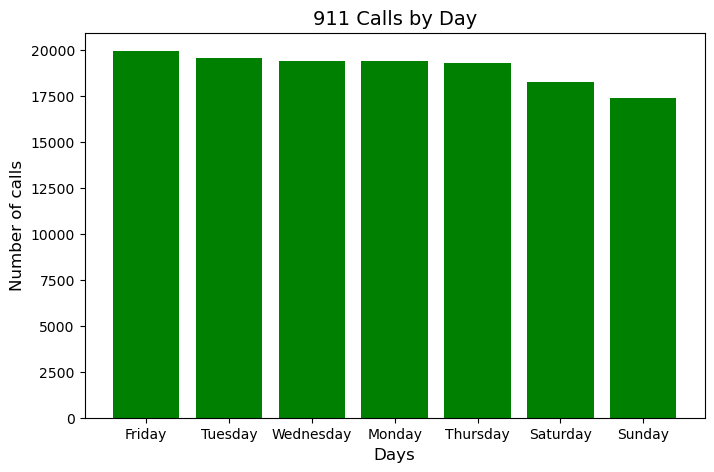

In [53]:
import matplotlib.pyplot as plt # ploting for the nuber of calls on daily basis

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(calls_by_day.index, calls_by_day.values, color = 'green')

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Number of calls", fontsize=12)
plt.title("911 Calls by Day", fontsize=14)
plt.xticks(rotation=0)  # Keep labels horizontal

# Show plot
plt.show()

### Question:6 Create a countplot of the Day of Week column with the hue based on the Reason column and Questionn

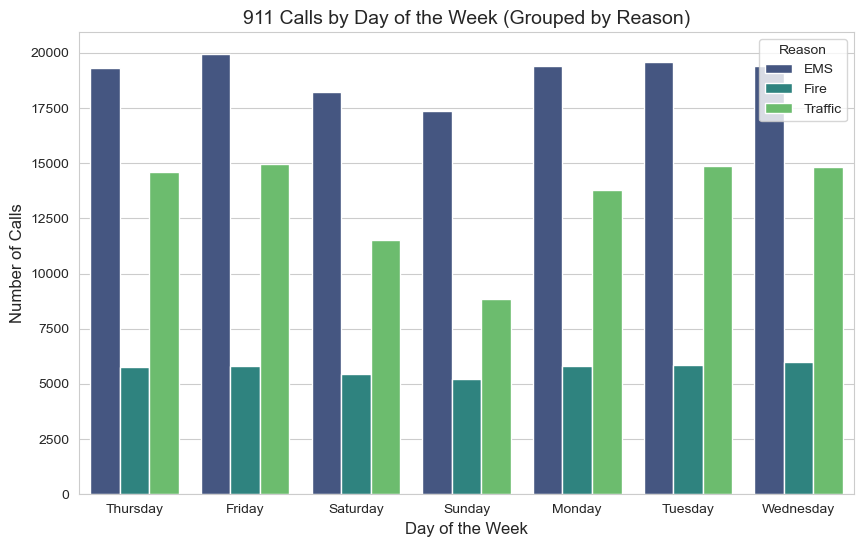

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x="DayOfWeek", hue="Reason", data=df, palette="viridis")

# Labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Calls", fontsize=12)
plt.title("911 Calls by Day of the Week (Grouped by Reason)", fontsize=14)

# Show plot
plt.show()


### Answer is : On "Sunday" the traffic calls were less

### Create a countplot month-wise -- Question 7: Which month saw the highest calls for fire??

In [60]:
# Ensure timeStamp is in datetime format
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# Extract the month and create a new column
df["Month"] = df["timeStamp"].dt.month_name()

# Display the first few rows to verify
print(df.head())


         lat Reason        lng  \
0  40.297876    EMS -75.581294   
1  40.258061    EMS -75.264680   
2  40.121182   Fire -75.351975   
3  40.116153    EMS -75.343513   
4  40.251492    EMS -75.603350   

                                                desc      zip  \
0  REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   

                     title           timeStamp                twp  \
0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTT

In [62]:
# Filter the dataset for 'Fire' calls
fire_calls = df[df["Reason"] == "Fire"]
fire_calls.head()

,lat,Reason,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek,Month
2,40.121182,Fire,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thursday,December
22,40.199006,Fire,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Thursday,December
27,40.028903,Fire,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Thursday,December
39,40.104206,Fire,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:32:25,UPPER MERION,HAMPTON RD & BELMONT RD,1,Thursday,December
45,40.224923,Fire,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,2015-12-10 18:50:23,LIMERICK,LINFIELD TRAPPE RD,1,Thursday,December


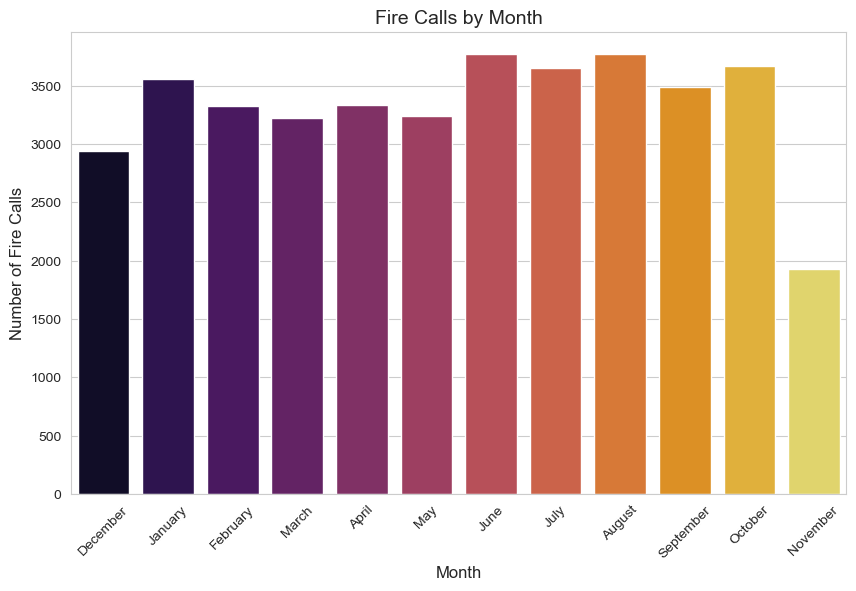

In [64]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x= "Month", hue="Month", legend = "auto", data=fire_calls, palette="inferno")

# Labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Fire Calls", fontsize=12)
plt.title("Fire Calls by Month", fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [65]:
# Count Fire calls by month (using the filtered 'fire_calls' DataFrame)
fire_calls_by_month = fire_calls["Month"].value_counts()

# Find the month with the highest Fire calls
max_fire_month = fire_calls_by_month.idxmax()
max_fire_calls = fire_calls_by_month.max()

# Print the result
print(f"The month with the highest Fire calls is {max_fire_month} with {max_fire_calls} calls.")


The month with the highest Fire calls is June with 3773 calls.


### Answer is :  the month of june has the max fire calls, but we can see the name of the months comming in jummbled way in the seaborn ploting, like not in cronical order. Lets fix it.

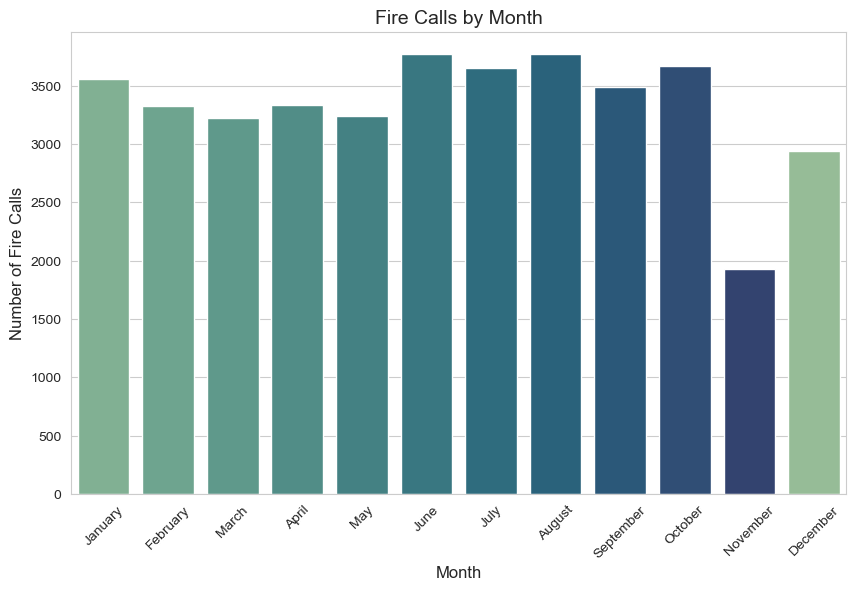

In [69]:
# Create the countplot with the cronical order of the months

plt.figure(figsize=(10, 6))
sns.countplot(x= "Month", hue="Month", legend = "auto", data=fire_calls, palette="crest", order=[
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])

# Labels and title

plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Fire Calls", fontsize=12)
plt.title("Fire Calls by Month", fontsize=14)

# Show the plot

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

### Now we can see the above problam is fixed

### Create Web Map for Traffic Calls and Question 8: Why do some areas 
seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [73]:
import folium

# Filter for Traffic calls
traffic_calls = df[df["Reason"] == "Traffic"]
traffic_calls.head()

,lat,Reason,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek,Month
9,40.102398,Traffic,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Thursday,December
10,40.231990,Traffic,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Thursday,December
11,40.084161,Traffic,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,Thursday,December
12,40.174131,Traffic,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Thursday,December
13,40.062974,Traffic,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Thursday,December


In [75]:
# Create a Folium map centered around the median location
map_center = [traffic_calls["lat"].median(), traffic_calls["lng"].median()]
traffic_map = folium.Map(location=map_center, zoom_start=10)

# Add traffic call locations as markers
for _, row in traffic_calls.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=3,  # Adjust size of the marker
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(traffic_map)

# Save the map as an HTML file
traffic_map.save("Traffic_Calls_Map.html")

print("Web map created! Open 'Traffic_Calls_Map.html' to view it.")

Web map created! Open 'Traffic_Calls_Map.html' to view it.


### In the above map is very difficult to analyse because of the markers are overlaping with each other. So that i have cluster the traffic map and made it easy to visulize.

In [77]:
from folium.plugins import MarkerCluster

# Filter for Traffic calls
traffic_calls = df[df["Reason"] == "Traffic"]

# Create a Folium map centered around the median location
map_center = [traffic_calls["lat"].median(), traffic_calls["lng"].median()]
traffic_map = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(traffic_map)

# Add traffic call locations as markers within the cluster
for _, row in traffic_calls.iterrows():
    folium.Marker(
        location=[row["lat"], row["lng"]],
        popup=f"Traffic Call at {row['lat']}, {row['lng']}",
        icon=folium.Icon(color="red", icon="car", prefix="fa"),  # Custom icon
    ).add_to(marker_cluster)

# Save the map as an HTML file
traffic_map.save("Traffic_Calls_Map_marker_cluster.html")

print("Web map with Marker Clusters created! Open 'Traffic_Calls_Map_marker_cluster.html' to view it.")

Web map with Marker Clusters created! Open 'Traffic_Calls_Map_marker_cluster.html' to view it.
